# **Income inequality prediction**

# **Introduction**

Income inequality - when income is distributed in an uneven manner among a population - is a growing problem in developing nations across the world. With the rapid rise of AI and worker automation, this problem could continue to grow if steps are not taken to address the issue. This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.

### **Aim of the Model**

The target feature is **income_above_limit** which is a binary-class variable. The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount. Your metric for evaluation will be f1-score

# **Importing libraries**

We will first have a section where we will import required libraries for our model building. Each time a new library is required to be built we will come to this section and code. This will help us have consolidated list of libraries which can be used for future reference as well 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report
from xgboost import XGBClassifier

# **Accessing and reading the dataset**

In order to start working on data, we need to access and get the dataset read.

In [2]:
income_inequality_df = pd.read_csv("Inequality_Prediction_Dataset.csv")
income_inequality_df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


# Copy of dataset

In order to main tain a backup for original data, it is advisable to maintain a make a deep copy of the same. 

Proceeding we will use this copy as we progress in our project development.

In [3]:
income_inequality_df1 = income_inequality_df.copy(deep=True)
income_inequality_df1.sample(20)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
96703,ID_TZ186218,40,Female,Masters degree(MA MS MEng MEd MSW MBA),State government,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1005.05,Below limit
93663,ID_TZ18348,51,Male,Doctorate degree(PhD EdD),State government,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,2255.92,Above limit
6940,ID_TZ105350,7,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,373.88,Below limit
62724,ID_TZ155606,34,Male,High school graduate,Local government,NaN,Divorced,White,All other,Full-time schedules,...,Canada,?,?,?,?,NaN,NaN,NaN,451.43,Above limit
66670,ID_TZ159161,60,Female,Some college but no degree,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1013.74,Below limit
128703,ID_TZ26549,15,Male,7th and 8th grade,NaN,NaN,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2622.22,Below limit
153247,ID_TZ48861,14,Male,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,1543.13,Below limit
34037,ID_TZ129762,48,Female,Some college but no degree,Private,NaN,Never married,White,Cuban,Full-time schedules,...,Cuba,?,?,?,?,NaN,NaN,NaN,1216.33,Below limit
154251,ID_TZ49774,61,Female,9th grade,Self-employed-not incorporated,NaN,Married-civilian spouse present,White,All other,PT for econ reasons usually PT,...,US,?,?,?,?,NaN,NaN,NaN,3405.84,Below limit
116965,ID_TZ204472,34,Male,High school graduate,Private,NaN,Divorced,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1166.92,Below limit


# **Exploratory Data Analysis**

Obtaining basic data details is essential to gain insight of the data.

Reference : https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

### **1. Getting to know basic details**

We will use `df.info` to retrieve basic details such as shape, data type, null values etc. In short an overall picture of the dataset.

In [4]:
income_inequality_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

### **2.Checking for duplicate values and count of unique values:**

We need to check if there is any repetitions in the dataset.. For this we will use `df.duplicated().sum()`

It is a good practice to identify the continuous and categorical variables in the data. For this we will use `df.nunique()` as it will give us the number of unique values in each column. 

In [5]:
display("Number of duplicate observations: ")
income_inequality_df1.duplicated().sum()

'Number of duplicate observations: '

0

In [6]:
display("Number of unique observations in each vector:")
income_inequality_df1.nunique()

'Number of unique observations in each vector:'

ID                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

**Observation**

Based of fewer unique values in comparison to the number of instances, we can infer that most data is categorical in nature. 

### **3. Knowing some basic statistics**
Getting to know basic statistics such as mean, median, mode, etc., of the data will help improve understanding of data. We will use `.df.describe()` function of pandas.
As we realise from above code, most data is categorical we need to include this in getting to know our statistics. This is an argument to be passed in the describe function of pandas

Reference (to include categorical variables) : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [7]:
income_inequality_df1.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,209499,209499,ID_TZ0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,209499.0,NaN,NaN,NaN,34.518728,22.306738,0.0,15.0,33.0,50.0,90.0
gender,209499,2,Female,108784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,209499,17,High school graduate,50627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,104254,8,Private,75617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_institute,13302,2,High school,7247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,209499,7,Never married,90723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,209499,5,White,175709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_hispanic,209499,10,All other,180404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_commitment,209499,8,Children or Armed Forces,129789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **6.Types of data in the dataset**

We will try to know the various types of data, such as numerical, discrete, continuous or categorical, that are available with in the dataset. This will help us in understanding the data in a better manner.

In [8]:
numerical_feature = [feature for feature in income_inequality_df1.columns if income_inequality_df1[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(income_inequality_df1[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in income_inequality_df1.columns if feature not in numerical_feature]

display("Number of features with numerical values: ", len(numerical_feature))
display("Number of features with discrete values: ", len(discrete_feature))
display("Number of features with continuous values: ", len(continuous_feature))
display("Number of features with categorical values: ", len(categorical_feature))


'Number of features with numerical values: '

13

'Number of features with discrete values: '

4

'Number of features with continuous values: '

9

'Number of features with categorical values: '

30

### **5.Getting to know the target variable**

Our target feature here is **income_above_limit**. Lack of understanding of our output feature will hamper the process of the project. Thus, it is important for us to know some details of the same.

*Reference : https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/*

'Target variable in figures: '

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

'Total observations in the target variable: '

209499

'Percentage break up of the figures in target variable: '

income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: count, dtype: float64

'Graphical representation of the target variable: '

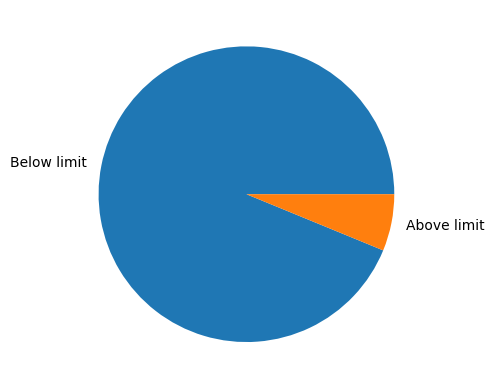

In [9]:
display("Target variable in figures: ", income_inequality_df1["income_above_limit"].value_counts())
display("Total observations in the target variable: ", len(income_inequality_df1["income_above_limit"]))
display("Percentage break up of the figures in target variable: ", (income_inequality_df["income_above_limit"].value_counts()/len(income_inequality_df1["income_above_limit"]))*100)
display("Graphical representation of the target variable: ")
plt.pie(income_inequality_df1["income_above_limit"].value_counts() , labels= income_inequality_df1["income_above_limit"].unique())
plt.show;


**Observation**

From the above graph it is clear that majority of the population has income *below limit* while a very small portion of the population has income *Above limit*.


We can also test a number of hypothesis here.

# **Preprocessing of data**

Preprocessing of data is an important step. At this point we will look into noise in data, manage any inconsistency and/or ambiguity in data and try to impute values for missing data. These issues were seen in the EDA process. We shall use some basic codes to remove ambiguity and vulnerabilities from the dataset. This results in improving of data quantity and quality, which are core in data model life cycle. Clean data will have fundamental effect on data model.

### **Replacing "?" with NaN**

We see that there are many missing values marked with **"?"**. As we have no clue about these we shall replace these "?" with NaN. This will help us better know the number of missing values and how data has to be treated going forward. We will use `df.replace()` to do this.

*Reference : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html*

In [10]:
income_inequality_df1.replace({" ?": np.nan}, inplace=True)
income_inequality_df1.sample(8)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
28989,ID_TZ125214,20,Female,Some college but no degree,Private,College or university,Never married,White,All other,Full-time schedules,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.84,Below limit
182938,ID_TZ75853,60,Female,High school graduate,Private,NaN,Divorced,White,All other,Children or Armed Forces,...,NaN,MSA to MSA,No,Different county same state,Different county same state,No,Midwest,Minnesota,1890.84,Below limit
189849,ID_TZ82136,79,Male,7th and 8th grade,NaN,NaN,Widowed,White,All other,Not in labor force,...,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2152.50,Below limit
27745,ID_TZ124094,70,Female,Some college but no degree,NaN,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,286.69,Below limit
3928,ID_TZ102637,16,Female,10th grade,NaN,High school,Never married,Other,Other Spanish,Not in labor force,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.00,Below limit
84876,ID_TZ175563,2,Male,Children,NaN,NaN,Never married,White,Central or South American,Children or Armed Forces,...,El-Salvador,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,321.10,Below limit
62378,ID_TZ155295,0,Male,Children,NaN,NaN,Never married,Amer Indian Aleut or Eskimo,Mexican-American,Children or Armed Forces,...,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.03,Below limit
191888,ID_TZ8399,26,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1858.99,Below limit


### **1.Checking for missing values**

We will check for **total of missing values** using `df.isnull().sum`. Followed by this we will calculate **percentage of null values** using `(df.isnull().sum()/len(df))*100`. This will give us a better insight on making a choice of deleting certain vectors while keeping the others.   


In [11]:
count_of_null_values = income_inequality_df1.isnull().sum()

display("Sum of null values in each feature: ", count_of_null_values )

'Sum of null values in each feature: '

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [12]:
percentage_of_null_values = ((count_of_null_values/len(income_inequality_df1))*100).round(decimals=0)

display("Percentage of null values in each vector: ", percentage_of_null_values)

'Percentage of null values in each vector: '

ID                                 0.0
age                                0.0
gender                             0.0
education                          0.0
class                             50.0
education_institute               94.0
marital_status                     0.0
race                               0.0
is_hispanic                        0.0
employment_commitment              0.0
unemployment_reason               97.0
employment_stat                    0.0
wage_per_hour                      0.0
is_labor_union                    90.0
working_week_per_year              0.0
industry_code                      0.0
industry_code_main                 0.0
occupation_code                    0.0
occupation_code_main              50.0
total_employed                     0.0
household_stat                     0.0
household_summary                  0.0
under_18_family                   72.0
veterans_admin_questionnaire      99.0
vet_benefit                        0.0
tax_status               

**Observation**

We see multiple columns with over 50% missing values. We will drop these columns as imputing values therein will lead to biasness in the data values.


### **2. Dropping some features**

As we have more than 50% data missing in certain columns we will drop them as they neither result in data loss nor add bias to the data.

**1. Getting names of those columns whose data is missing by more than 50%.**

In [13]:
original_shape_of_dataset = income_inequality_df1.shape

display("Shape of the original data: ", original_shape_of_dataset)

'Shape of the original data: '

(209499, 43)

In [14]:
def to_get_list_of_null_values(df):
    columns_to_drop = []
    for column in df.columns:
        if df[column].isnull().sum()/df.shape[0] > 0.5:
            columns_to_drop.append(column)
    return columns_to_drop

list_of_columns_to_drop = to_get_list_of_null_values(income_inequality_df1)
display (list_of_columns_to_drop)

['class',
 'education_institute',
 'unemployment_reason',
 'is_labor_union',
 'occupation_code_main',
 'under_18_family',
 'veterans_admin_questionnaire',
 'migration_code_change_in_msa',
 'migration_prev_sunbelt',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg',
 'residence_1_year_ago',
 'old_residence_reg',
 'old_residence_state']

**2. Dropping the columns with null values and getting remaining features**

We will use `df.drop()` function for dropping the above mentioned features with minimal data. 

In [15]:
def to_drop_columns(df, list_of_columns):
    for i in list_of_columns:
        for column in df:
            if column == i:
                df.drop(column, axis = 1, inplace =True)
    return df.columns

remaining_features = to_drop_columns(income_inequality_df1, list_of_columns_to_drop)
display ("Remaining features in the dataset: ", remaining_features)

'Remaining features in the dataset: '

Index(['ID', 'age', 'gender', 'education', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [16]:
new_shape_of_dataset = income_inequality_df1.shape

display( "New shape of the dataset: ", new_shape_of_dataset)

'New shape of the dataset: '

(209499, 29)

**Observation**

We see that the number of features of the dataset has reduced to 29 from the original count of 43. Thus we were able to remove incomplete and inconsistent data.

We will now have a quick check on the total null values that remain. We need this information as we need to impute values using appropriate methods.

In [17]:
income_inequality_df1.isnull().sum()

ID                            0
age                           0
gender                        0
education                     0
marital_status                0
race                          0
is_hispanic                   0
employment_commitment         0
employment_stat               0
wage_per_hour                 0
working_week_per_year         0
industry_code                 0
industry_code_main            0
occupation_code               0
total_employed                0
household_stat                0
household_summary             0
vet_benefit                   0
tax_status                    0
gains                         0
losses                        0
stocks_status                 0
citizenship                   0
mig_year                      0
country_of_birth_own       3667
country_of_birth_father    7181
country_of_birth_mother    6516
importance_of_record          0
income_above_limit            0
dtype: int64

We see that only three columns are having missing values. Namely, "country_of_birth_own", "country_of_birth_father" and "country_of_birth_mother". None of these column details seem to have impact on the income level. Thus we shall drop these columns using `df.drop()`

In [18]:
income_inequality_df1.drop(labels=["country_of_birth_own", "country_of_birth_father", "country_of_birth_mother"], axis= 1, inplace= True)
income_inequality_df1.columns

Index(['ID', 'age', 'gender', 'education', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'importance_of_record', 'income_above_limit'],
      dtype='object')

In [19]:
income_inequality_df1.sample(5)

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
78895,ID_TZ170175,11,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,1183.45,Below limit
168558,ID_TZ62780,24,Female,Masters degree(MA MS MEng MEd MSW MBA),Never married,White,All other,Full-time schedules,2,0,...,Householder,2,Single,0,0,0,Native,95,1147.20,Below limit
102081,ID_TZ191063,59,Male,9th grade,Married-civilian spouse present,White,All other,Full-time schedules,0,0,...,Householder,2,Joint both under 65,0,0,0,Native,95,1116.17,Below limit
84505,ID_TZ175229,79,Male,Some college but no degree,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Householder,2,Joint both 65+,20051,0,25000,Native,95,1843.98,Above limit
28370,ID_TZ124657,32,Female,Some college but no degree,Never married,Black,All other,Children or Armed Forces,0,0,...,Householder,2,Head of household,0,0,0,Native,94,2086.31,Below limit


### **3. Saving the file for future reference**

We will save this current file using **joblib** for future reference. This is an important step before we encode categorical data.

*Reference : https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/#:~:text=The%20pickle%20module%20keeps%20track,like%20the%20one%20we%20used.*

*Reference : https://www.analyticsvidhya.com/blog/2023/02/how-to-save-and-load-machine-learning-models-in-python-using-joblib-library/*

Compared to other techniques of storing and loading machine learning models, using Joblib has a number of benefits. Since data is stored as byte strings rather than objects, it may be stored quickly and easily in a smaller amount of space than traditional pickling. Moreover, it automatically corrects errors when reading or writing files, making it more dependable than manual pickling. Last but not least, using joblib enables you to save numerous iterations of the same model, making it simpler to contrast them and identify the most accurate one.

Joblib enables multiprocessing across several machines or cores on a single machine, which enables programmers to parallelize jobs across numerous machines. This makes it simple for programmers to utilize distributed computing resources like clusters or GPUs to accelerate their model training process.
We shall We shall save the dataset to a variable, which is the model_name and then use `joblib.dump(model_name, "file_name_to_be_stored")`.

We can also use pandas to save data for future use by using 

`import pandas as pd`

`df.to_csv("./dataset_name.csv",index=False)`

In [20]:
# income_inequality_df1_raw_data = income_inequality_df1

# joblib.dump(income_inequality_df1_raw_data, "income_inequality_df1.joblib")

income_inequality_df1.to_csv("./income_inequality_df_preprocessed.csv", index= False)

Let us now check for missing values and percentage of missing values to know if our dataset is free of null values

In [21]:
display ("Count of null values: ")
income_inequality_df1.isnull().sum()



'Count of null values: '

ID                       0
age                      0
gender                   0
education                0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
total_employed           0
household_stat           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

In [22]:
display("Percentage of null values: ", (income_inequality_df1.isnull().sum()/income_inequality_df1.shape[0])*100)


'Percentage of null values: '

ID                       0.0
age                      0.0
gender                   0.0
education                0.0
marital_status           0.0
race                     0.0
is_hispanic              0.0
employment_commitment    0.0
employment_stat          0.0
wage_per_hour            0.0
working_week_per_year    0.0
industry_code            0.0
industry_code_main       0.0
occupation_code          0.0
total_employed           0.0
household_stat           0.0
household_summary        0.0
vet_benefit              0.0
tax_status               0.0
gains                    0.0
losses                   0.0
stocks_status            0.0
citizenship              0.0
mig_year                 0.0
importance_of_record     0.0
income_above_limit       0.0
dtype: float64

In [23]:
income_inequality_df1.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,Householder,2,Head of household,0,0,292,Native,95,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,Householder,2,Single,0,0,0,Native,94,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,Child 18 or older,2,Single,0,0,0,Native,94,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,Below limit


**Checking values of categorical variables**

As we initially had almost 30 vectors with categorical data, it is better for us to get an insight into the values of these. Although some of the columns are deleted, we will check values of the remaining categorical columns. This will help us know if data is relevant for our model building. In other words, is it impacting our target variable or is it just additional data. 

In [24]:
numerical_feature = [feature for feature in income_inequality_df1.columns if income_inequality_df1[feature].dtypes != 'O']
categorical_feature = [feature for feature in income_inequality_df1.columns if feature not in numerical_feature]

for i in categorical_feature:
    display(i, income_inequality_df1[i].unique())

'ID'

array(['ID_TZ0000', 'ID_TZ0001', 'ID_TZ0002', ..., 'ID_TZ99997',
       'ID_TZ99998', 'ID_TZ99999'], dtype=object)

'gender'

array([' Female', ' Male'], dtype=object)

'education'

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

'marital_status'

array([' Widowed', ' Never married', ' Married-civilian spouse present',
       ' Divorced', ' Married-spouse absent', ' Separated',
       ' Married-A F spouse present'], dtype=object)

'race'

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

'is_hispanic'

array([' All other', ' Mexican-American', ' Central or South American',
       ' Mexican (Mexicano)', ' Puerto Rican', ' Other Spanish', ' NA',
       ' Cuban', ' Do not know', ' Chicano'], dtype=object)

'employment_commitment'

array([' Not in labor force', ' Children or Armed Forces',
       ' Full-time schedules', ' PT for econ reasons usually PT',
       ' Unemployed full-time', ' PT for non-econ reasons usually FT',
       ' PT for econ reasons usually FT', ' Unemployed part- time'],
      dtype=object)

'industry_code_main'

array([' Not in universe or children', ' Hospital services',
       ' Retail trade', ' Finance insurance and real estate',
       ' Manufacturing-nondurable goods', ' Transportation',
       ' Business and repair services', ' Medical except hospital',
       ' Education', ' Construction', ' Manufacturing-durable goods',
       ' Public administration', ' Agriculture',
       ' Other professional services', ' Mining',
       ' Utilities and sanitary services', ' Private household services',
       ' Personal services except private HH', ' Wholesale trade',
       ' Communications', ' Entertainment', ' Social services',
       ' Forestry and fisheries', ' Armed Forces'], dtype=object)

'household_stat'

array([' Householder', ' Nonfamily householder',
       ' Child 18+ never marr Not in a subfamily',
       ' Child <18 never marr not in subfamily', ' Spouse of householder',
       ' Child 18+ spouse of subfamily RP', ' Secondary individual',
       ' Child 18+ never marr RP of subfamily',
       ' Other Rel 18+ spouse of subfamily RP',
       ' Grandchild <18 never marr not in subfamily',
       ' Other Rel <18 never marr child of subfamily RP',
       ' Other Rel 18+ ever marr RP of subfamily',
       ' Other Rel 18+ ever marr not in subfamily',
       ' Child 18+ ever marr Not in a subfamily',
       ' RP of unrelated subfamily',
       ' Child 18+ ever marr RP of subfamily',
       ' Other Rel 18+ never marr not in subfamily',
       ' Child under 18 of RP of unrel subfamily',
       ' Grandchild <18 never marr child of subfamily RP',
       ' Grandchild 18+ never marr not in subfamily',
       ' Other Rel <18 never marr not in subfamily', ' In group quarters',
       ' Grandchild

'household_summary'

array([' Householder', ' Child 18 or older',
       ' Child under 18 never married', ' Spouse of householder',
       ' Nonrelative of householder', ' Other relative of householder',
       ' Group Quarters- Secondary individual',
       ' Child under 18 ever married'], dtype=object)

'tax_status'

array([' Head of household', ' Single', ' Nonfiler', ' Joint both 65+',
       ' Joint both under 65', ' Joint one under 65 & one 65+'],
      dtype=object)

'citizenship'

array(['Native', ' Foreign born- Not a citizen of U S ',
       ' Foreign born- U S citizen by naturalization',
       ' Native- Born abroad of American Parent(s)',
       ' Native- Born in Puerto Rico or U S Outlying'], dtype=object)

'income_above_limit'

array(['Below limit', 'Above limit'], dtype=object)

From the above we can conclude vector **household_stat** is populated with data which is irrelevant to the objective of the model. Thus, it is better to drop the same.

In [25]:
income_inequality_df1.drop(labels= "household_stat", axis= 1, inplace= True)
income_inequality_df1.shape



(209499, 25)

In [26]:
numerical_feature = [feature for feature in income_inequality_df1.columns if income_inequality_df1[feature].dtypes != 'O']
categorical_feature = [feature for feature in income_inequality_df1.columns if feature not in numerical_feature]

### **Managing imbalance in data**

From our analysis of target variable, **income_above_limit** we know that our data set is highly imbalanced. To prevent the bias and maintain equilibrium in our prediction, it is advisable to augment / upscale our data. We can use multiple methods to increase the samples in our dataset, such as SMOTE, RandomOverSampler, etc.

*Reference : https://www.geeksforgeeks.org/introduction-to-resampling-methods/*

In this project we will be using the RandomOverSampler.

**Dividing data into dataset and target variable**

In [27]:
x = income_inequality_df1.drop(labels= ["income_above_limit"],axis=1)
y = income_inequality_df1["income_above_limit"]

In [28]:
x.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,2,Householder,2,Head of household,0,0,292,Native,95,1779.74
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,0,Householder,2,Single,0,0,0,Native,94,2366.75
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,4,Child 18 or older,2,Single,0,0,0,Native,94,1693.42
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,0,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79


In [29]:
y.head()

0    Below limit
1    Below limit
2    Below limit
3    Below limit
4    Below limit
Name: income_above_limit, dtype: object

In [30]:
income_inequality_df1_oversampled = RandomOverSampler(random_state= 30)
x_oversampled, y_oversampled = income_inequality_df1_oversampled.fit_resample(x, y)

In [31]:
display("The class imbalance in terms of percentage is given below: ", (y_oversampled.value_counts()/len(y_oversampled))*100)


'The class imbalance in terms of percentage is given below: '

income_above_limit
Below limit    50.0
Above limit    50.0
Name: count, dtype: float64

From the above we know that we have a balanced data. Before we proceed with building a model, we shall first split data in train_test datasets. Then we need to encode the categorical variables of the data. This will help reduce data leakage.

*Reference : https://en.wikipedia.org/wiki/Leakage_(machine_learning)*

- Data Leakage : In statistics and machine learning, leakage (also known as data leakage or target leakage) is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment.

Leakage is often subtle and indirect, making it hard to detect and eliminate. Leakage can cause a statistician or modeler to select a suboptimal
model, which could be outperformed by a leakage-free model.

### **Train_Test_Split**

We will first divide data into training data and testing data


In [32]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(146649, 24) (62850, 24) (146649,) (62850,)


**Encoding categorical data**

It is important to encode categorical data to further explore and work around with data. It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

The popular Python machine learning library *Scikit-learn* provides `OneHotEncoder()` method that can be used for one hot encoding. Then, there is also the Pandas method called `get_dummies()` for one hot encoding.

*Reference : https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/*

*Reference : https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/?utm_content=cmp-true*

*Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html*



In [33]:
x_train.reset_index(drop=True,inplace=True) ## we are dropping the index column from the train df to avoid encoding of the same
x_train.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,ID_TZ148499,45,Female,Some college but no degree,Never married,White,All other,Not in labor force,0,0,...,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,951.06
1,ID_TZ123335,42,Male,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,6,Householder,1,Joint both under 65,0,0,166,Native,95,1423.95
2,ID_TZ134926,26,Male,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,2,0,...,6,Householder,2,Joint both under 65,0,0,0,Native,95,1615.88
3,ID_TZ121879,29,Male,Associates degree-occup /vocational,Married-civilian spouse present,Black,All other,Full-time schedules,0,0,...,6,Spouse of householder,2,Joint both under 65,0,0,8000,Native,95,4087.92
4,ID_TZ26518,46,Male,High school graduate,Married-civilian spouse present,White,All other,Unemployed full-time,0,0,...,2,Householder,2,Joint both under 65,0,0,0,Native,95,2225.62


In [34]:
x_test.reset_index(drop=True,inplace=True)  ## we are dropping the index column from the test df to avoid encoding of the same
x_test.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,ID_TZ146213,21,Male,9th grade,Never married,White,Central or South American,PT for econ reasons usually PT,0,0,...,2,Nonrelative of householder,2,Single,0,0,0,Foreign born- Not a citizen of U S,95,668.07
1,ID_TZ198016,48,Male,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,4,Householder,2,Joint both under 65,0,0,0,Native,94,2794.89
2,ID_TZ202976,14,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,2659.76
3,ID_TZ71135,22,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,...,6,Child 18 or older,2,Single,0,0,0,Native,95,1655.77
4,ID_TZ168314,45,Female,High school graduate,Separated,Black,All other,Children or Armed Forces,0,0,...,0,Householder,2,Nonfiler,0,0,0,Native,94,2526.87


Dropping ID column as it is demographic data which is irrelevant for the objective of this project

In [35]:
x_train.drop(labels= "ID", axis=1, inplace= True)
x_test.drop(labels= "ID", axis=1, inplace= True)

### **Encoding using One Hot Encoder**

**1.Encoding train dataset**

In [36]:
columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main','household_summary','tax_status','citizenship']

columns_to_keep = x_train.drop(columns_to_encode,axis=1).columns

income_inequality_encoded = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = income_inequality_encoded.fit_transform(x_train[columns_to_encode])

income_inequality_encoded_df = pd.DataFrame(encoded_columns, columns=income_inequality_encoded.get_feature_names_out(columns_to_encode))

x_train_encoded = pd.concat([income_inequality_encoded_df, x_train[columns_to_keep]], axis=1)

In [37]:
x_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,95,951.06
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,0,0,6,1,0,0,166,95,1423.95
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,33,19,6,2,0,0,0,95,1615.88
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,12,35,6,2,0,0,8000,95,4087.92
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,4,34,2,2,0,0,0,95,2225.62


**2.Encoding test dataset**

In [38]:
encoded_columns = income_inequality_encoded.transform(x_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=income_inequality_encoded.get_feature_names_out(columns_to_encode))

x_test_encoded = pd.concat([encoded_df, x_test[columns_to_keep]], axis=1)

x_test_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,52,4,34,2,2,0,0,0,95,668.07
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,11,35,4,2,0,0,0,94,2794.89
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,95,2659.76
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39,43,25,6,2,0,0,0,95,1655.77
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,94,2526.87


In [39]:
display("Shape of encoded train dataset: ", x_train_encoded.shape)

display("Shape of encoded test dataset: ", x_test_encoded.shape)

'Shape of encoded train dataset: '

(146649, 105)

'Shape of encoded test dataset: '

(62850, 105)

**Replacing unique values in target variable of train and test data**

In [40]:
y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

C:\Users\Sandy\AppData\Local\Temp\ipykernel_11696\604834780.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
C:\Users\Sandy\AppData\Local\Temp\ipykernel_11696\604834780.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'Below limit':0,'Above limit':1},inplace=True)


# **Model Building**

We have divided data into train_test_split datasets and then encoded each of them. This prevents data leakage. Now we shall proceed with model building.

We will fit train dataset and predict for test dataset

### **RandomForest Classifier**

In [41]:
income_inequality_classifier = RandomForestClassifier(random_state= 30)
income_inequality_classifier.fit(x_train_encoded, y_train)

y_pred_income_inequality_rf_classifier = income_inequality_classifier.predict(x_test_encoded)
display("RandomForest Classifier :")
display("f-1 score :", f1_score(y_test, y_pred_income_inequality_rf_classifier))

'RandomForest Classifier :'

'f-1 score :'

0.5343056015909844

In [42]:
print(classification_report(y_test, y_pred_income_inequality_rf_classifier))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     58943
           1       0.76      0.41      0.53      3907

    accuracy                           0.96     62850
   macro avg       0.86      0.70      0.76     62850
weighted avg       0.95      0.96      0.95     62850



### **ExtraTree Model**

In [43]:
income_inequality_extratree_classifier = ExtraTreesClassifier(random_state= 30)
income_inequality_extratree_classifier.fit(x_train_encoded, y_train)
y_pred_extraTree = income_inequality_extratree_classifier.predict(x_test_encoded)

display("ExtraTree Classifier :")
display("f-1 score :", f1_score(y_test, y_pred_extraTree))

'ExtraTree Classifier :'

'f-1 score :'

0.489567931657631

In [44]:
print(classification_report(y_test, y_pred_extraTree))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     58943
           1       0.68      0.38      0.49      3907

    accuracy                           0.95     62850
   macro avg       0.82      0.68      0.73     62850
weighted avg       0.94      0.95      0.94     62850



**XGBoost Classifier**

In [45]:
income_inequality_xgb_classifier = XGBClassifier()
income_inequality_xgb_classifier.fit(x_train_encoded, y_train)
y_pred_xgb = income_inequality_xgb_classifier.predict(x_test_encoded)
display("xgb Classifier :")
display("f-1 score :", f1_score(y_test, y_pred_xgb))

'xgb Classifier :'

'f-1 score :'

0.5914966516118985

In [46]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     58943
           1       0.76      0.49      0.59      3907

    accuracy                           0.96     62850
   macro avg       0.86      0.74      0.78     62850
weighted avg       0.95      0.96      0.95     62850



# **Hyperparameter Tuning**

Model Tuning is a process where we define search space algorithms that can optimize the hyperparameters of a baseline model. Hyperparameters are manual parameters that can impact a model's learning capacity. Optimization of those parameters is called hyperparameter tuning. 

*Reference : https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/*

*Reference : https://towardsdatascience.com/faster-hyperparameter-tuning-with-scikit-learn-71aa76d06f12*

In [47]:
# Hyperparameter tuning with GridSearchCV

extratree_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

g_search_cv = GridSearchCV(income_inequality_extratree_classifier, extratree_params , cv = 5, scoring = "accuracy")
g_search_cv.fit(x_train_encoded, y_train)

display(g_search_cv.best_params, g_search_cv.best_score)

KeyboardInterrupt: 